In [51]:
import math

from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns

In [52]:
df = pd.read_csv('data/5/titanic_train.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,3,1,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,NaN
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,"Co Clare, Ireland Washington, DC"
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,NaN
3,3,0,"Vovk, Mr. Janko",male,22.0,0,0,349252,7.8958,NaN,S,NaN
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,0,0,A. 2. 39186,8.0500,NaN,S,NaN
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,NaN,S,"England Oglesby, IL"
978,2,0,"Gillespie, Mr. William Henry",male,34.0,0,0,12233,13.0000,NaN,S,"Vancouver, BC"
979,3,0,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S,"England New York, NY"


In [61]:
df['age'].isna().sum()

199

<Axes: xlabel='pclass', ylabel='count'>

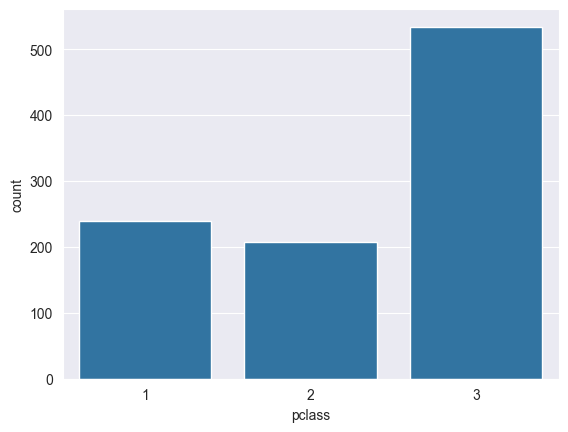

In [54]:
sns.barplot(df['pclass'].value_counts())

In [55]:
survived_stats = df['survived'].value_counts()
np.round(survived_stats[1] / df['survived'].count(), 3)

0.382

In [62]:
missing_cols = 0
for col in df.columns:
    missing_prop = df[col].isna().sum() / df[col].count()
    if missing_prop > 1 / 3:
        missing_cols += 1
        print(f'Col {col} have too many missing values')

print('------------------------------')
print(f'All cols: {len(df.columns)}, missing cols: {missing_cols}')

Col cabin have too many missing values
Col home.dest have too many missing values
------------------------------
All cols: 10, missing cols: 2


In [57]:
df['fam_size'] = df['sibsp'] + df['parch']
df.drop(['ticket', 'sibsp', 'parch'], axis=1, inplace=True)
df

,pclass,survived,name,sex,age,fare,cabin,embarked,home.dest,fam_size
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,NaN,Q,NaN,0
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,NaN,Q,"Co Clare, Ireland Washington, DC",0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,NaN,C,NaN,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,NaN,S,NaN,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,NaN,S,NaN,0
...,...,...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,8.0500,NaN,S,NaN,0
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,8.0500,NaN,S,"England Oglesby, IL",0
978,2,0,"Gillespie, Mr. William Henry",male,34.0,13.0000,NaN,S,"Vancouver, BC",0
979,3,0,"Barton, Mr. David John",male,22.0,8.0500,NaN,S,"England New York, NY",0


In [59]:
np.round(df['fam_size'].mean(), 3)

0.866

In [60]:
df_initial = df.copy()

In [64]:
df_female_1 = df.copy()
df_female_1 = df_female_1[df_female_1['sex'] == 'female']
df_female_1 = df_female_1[df_female_1['pclass'] == 1]
df_female_1

,pclass,survived,name,sex,age,fare,cabin,embarked,home.dest,fam_size
17,1,1,"Crosby, Miss. Harriet R",female,36.0,71.0000,B22,S,"Milwaukee, WI",2
28,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,25.9292,D17,S,"Brooklyn, NY",0
46,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,49.5042,C90,C,"Belgium Montreal, PQ",0
48,1,1,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54.0,81.8583,A34,S,"San Francisco, CA",2
50,1,1,"Willard, Miss. Constance",female,21.0,26.5500,NaN,S,"Duluth, MN",0
...,...,...,...,...,...,...,...,...,...,...
958,1,1,"Compton, Miss. Sara Rebecca",female,39.0,83.1583,E49,C,"Lakewood, NJ",2
960,1,1,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic...",female,18.0,53.1000,D30,S,"New York, NY",1
965,1,1,"Young, Miss. Marie Grice",female,36.0,135.6333,C32,C,"New York, NY / Washington, DC",0
966,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,93.5000,B69,S,"Montreal, PQ",2


In [66]:
np.round(df_female_1['survived'].sum() / df_female_1['survived'].count(), 3) 

0.971

<Axes: xlabel='age', ylabel='count'>

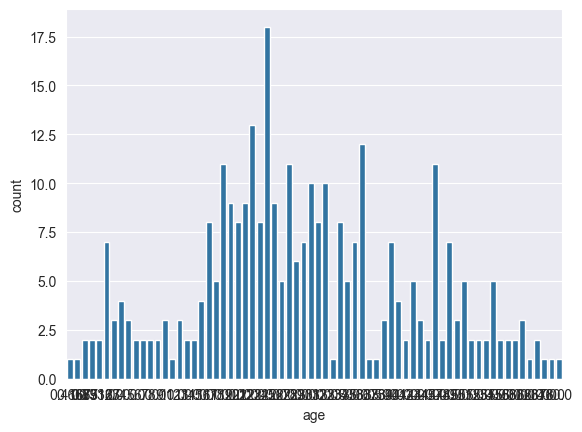

In [72]:
df_survived = df[df['survived'] == 1]
sns.barplot(df_survived['age'].value_counts())

<Axes: xlabel='age', ylabel='count'>

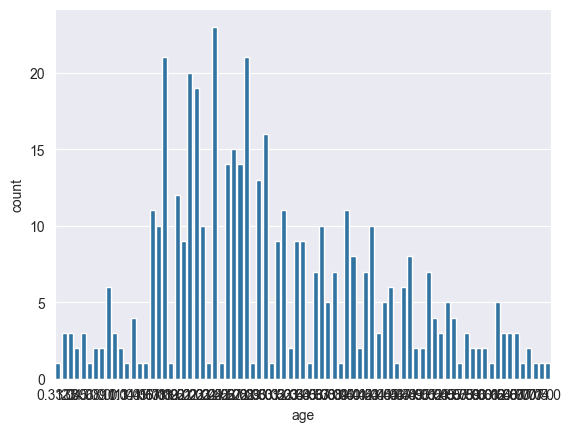

In [73]:
df_non_survived = df[df['survived'] == 0]
sns.barplot(df_non_survived['age'].value_counts())

# Task 2

In [89]:
df_numerical = df.drop(['name', 'home.dest', 'sex', 'cabin', 'embarked'], axis=1)
df_numerical_dropped = df_numerical.dropna()
df_numerical_dropped

,pclass,survived,age,fare,fam_size
2,3,1,38.0,7.2292,0
3,3,0,22.0,7.8958,0
4,3,0,16.0,9.5000,0
5,3,1,29.0,7.7500,0
7,1,0,25.0,26.0000,0
...,...,...,...,...,...
975,2,0,19.0,10.5000,0
977,3,1,19.0,8.0500,0
978,2,0,34.0,13.0000,0
979,3,0,22.0,8.0500,0


In [90]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

def split_dataset(dataset: pd.DataFrame, column: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    return dataset.drop(column, axis=1), dataset[column]


def get_f1_score(dataset, label: str):
    X, Y = split_dataset(dataset, label)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=35, stratify=dataset[label])

    regressor = LogisticRegression(random_state=35, max_iter=1000)
    regressor.fit(X_train, Y_train)
    Y_predicted = regressor.predict(X_test)

    return np.round(f1_score(Y_test, Y_predicted), 3)

In [91]:
get_f1_score(df_numerical_dropped, 'survived')

0.518

In [93]:
df_numerical_mean = df_numerical.fillna(df_numerical.mean())
df_numerical_mean

,pclass,survived,age,fare,fam_size
0,3,1,29.963448,7.7333,0
1,3,1,29.963448,7.7500,0
2,3,1,38.000000,7.2292,0
3,3,0,22.000000,7.8958,0
4,3,0,16.000000,9.5000,0
...,...,...,...,...,...
976,3,1,29.963448,8.0500,0
977,3,1,19.000000,8.0500,0
978,2,0,34.000000,13.0000,0
979,3,0,22.000000,8.0500,0


In [94]:
get_f1_score(df_numerical_mean, 'survived')

0.483

In [123]:
def get_appeals(v):
    return v.split(', ')[1].split('. ')[0]

df_processed = df_numerical.copy()
unique_appeals = df['name'].apply(get_appeals).unique()
unique_appeals

array(['Miss', 'Mrs', 'Mr', 'Master', 'Mlle', 'Rev', 'Ms', 'Col', 'Dona',
       'Dr', 'the Countess', 'Major', 'Don', 'Capt'], dtype=object)

In [124]:
df_processed['honorific'] = df['name'].apply(get_appeals)
df_processed

,pclass,survived,age,fare,fam_size,honorific
0,3,1,NaN,7.7333,0,Miss
1,3,1,NaN,7.7500,0,Miss
2,3,1,38.0,7.2292,0,Mrs
3,3,0,22.0,7.8958,0,Mr
4,3,0,16.0,9.5000,0,Mr
...,...,...,...,...,...,...
976,3,1,NaN,8.0500,0,Miss
977,3,1,19.0,8.0500,0,Mr
978,2,0,34.0,13.0000,0,Mr
979,3,0,22.0,8.0500,0,Mr


In [125]:
mapper = {
    'Rev': 'Mr',
    'Col': 'Mr',
    'Dr': 'Mr',
    'Major': 'Mr',
    'Don': 'Mr',
    'Capt': 'Mr',
    
    'Dona': 'Mrs',
    'the Countess': 'Mrs',
    
    'Mlle': 'Miss',
    'Ms': 'Miss'
}

df_processed['honorific'] = df_processed['honorific'].apply(lambda x: mapper.get(x, x))
df_processed

,pclass,survived,age,fare,fam_size,honorific
0,3,1,NaN,7.7333,0,Miss
1,3,1,NaN,7.7500,0,Miss
2,3,1,38.0,7.2292,0,Mrs
3,3,0,22.0,7.8958,0,Mr
4,3,0,16.0,9.5000,0,Mr
...,...,...,...,...,...,...
976,3,1,NaN,8.0500,0,Miss
977,3,1,19.0,8.0500,0,Mr
978,2,0,34.0,13.0000,0,Mr
979,3,0,22.0,8.0500,0,Mr


In [126]:
np.round(df_processed['honorific'].value_counts()['Master'] / df['sex'].value_counts()['male'], 3) 

0.072

In [127]:
np.round(df_processed[df_processed['honorific'] == 'Master']['age'].mean(), 3)

5.128

In [132]:
import math

means = {appeal: df_processed[df_processed['honorific'] == appeal]['age'].mean() for appeal in unique_appeals}

def fill_age(row):
    if not math.isnan(row['age']):
        return row['age']
    return means[row['honorific']]

df_processed['age'] = df_processed[['age', 'honorific']].apply(fill_age, axis=1)
df_processed

,pclass,survived,age,fare,fam_size,honorific
0,3,1,22.005765,7.7333,0,Miss
1,3,1,22.005765,7.7500,0,Miss
2,3,1,38.000000,7.2292,0,Mrs
3,3,0,22.000000,7.8958,0,Mr
4,3,0,16.000000,9.5000,0,Mr
...,...,...,...,...,...,...
976,3,1,22.005765,8.0500,0,Miss
977,3,1,19.000000,8.0500,0,Mr
978,2,0,34.000000,13.0000,0,Mr
979,3,0,22.000000,8.0500,0,Mr


In [136]:
df_processed_dropped = df_processed.drop('honorific', axis=1)

get_f1_score(df_processed_dropped, 'survived')

0.466

In [145]:
df_original_with_fixed_age = df.copy()
df_original_with_fixed_age['age'] = df_processed['age']
df_original_with_fixed_age.drop(['name', 'cabin', 'home.dest'], axis=1, inplace=True)
df_original_with_fixed_age

,pclass,survived,sex,age,fare,embarked,fam_size
0,3,1,female,22.005765,7.7333,Q,0
1,3,1,female,22.005765,7.7500,Q,0
2,3,1,female,38.000000,7.2292,C,0
3,3,0,male,22.000000,7.8958,S,0
4,3,0,male,16.000000,9.5000,S,0
...,...,...,...,...,...,...,...
976,3,1,female,22.005765,8.0500,S,0
977,3,1,male,19.000000,8.0500,S,0
978,2,0,male,34.000000,13.0000,S,0
979,3,0,male,22.000000,8.0500,S,0


In [146]:
df_original_with_fixed_age = pd.get_dummies(df_original_with_fixed_age, drop_first=True)

In [147]:
get_f1_score(df_original_with_fixed_age, 'survived')

0.71